# Theoretical Introduction

In this notebook we discretize and solve the fluid equations in 2D, to demonstrate the Mimetic Finite Difference (MFD) method.
We will consider the incomressible Euler equations:
\begin{align*}
\nabla \cdot \vec{u} &= 0 \\
\frac{\partial \vec{u}}{\partial t} + \vec{u} \cdot \nabla \vec{u} + \frac{1}{\rho}\nabla p &= \vec{f}
\end{align*}

where $\vec{u}$ is the velocity field, $p$ is the pressure driving the internal source term $\nabla p$, and $\vec{f}$ is the external source term representing external forces. These equations are solved on a domain $\Omega \subset \mathbb{R}^2$.

The velocity is first advected by solving 
$\partial \vec{u}/\partial t + \vec{u} \cdot \nabla \vec{u} = 0$ on a divergence-free velocity field. The external forces $\vec{f}$ are then applied to the resulting velocity field. Finally the velocity is corrected to be divergence-free using the incomressibility equations
\begin{align}
\nabla \cdot \vec{u} &= 0 \\
\frac{\partial \vec{u}}{\partial t} + \frac{1}{\rho}\nabla p &= 0
\end{align}

The MFD method is used to solve for incompressibility of the velocity field. In the following sections, we shall denote the advected velocity by $\vec{u}^*$ and assume that $\vec{f} = \vec{0}$ unless otherwise stated. The second incompressibility equation is discretized in time using a forward Euler scheme thus reducing the above equations to
\begin{align*}
\nabla \cdot \vec{u} &= 0 \\
\vec{u} &= \vec{u}^* - \Delta t \nabla p
\end{align*}

where we have taken $\rho = 1$ for simplicity. We can now eliminate the velocity unknown, further simplifying the equation to
$$ \Delta t \nabla \cdot \nabla p = \nabla \cdot \vec{u}^*, $$
which is precisely the equation we will focus on.

A critical part of the method is enforcing boundary conditions. In general the above equations are subject to Dirichlet and Neumann boundary conditions:
\begin{align*}
p &= f^D \text{ on } \Gamma^D \\
\hat{n} \cdot \vec{u} &= f^N \text{ on } \Gamma^N
\end{align*}

where $\Gamma^D$ and $\Gamma^N$ are parts of the boundary on which Dirichlet and Neumann conditions are enforced respectively, and $\hat{n}$ is the outward facing normal to the domain boundary $\partial \Omega = \Gamma^D \cup \Gamma^N$. The Neumann boundary condition can be rewritten as:
$$ \hat{n} \cdot \Delta t \nabla {p} = \hat{n} \cdot \vec{u}^* - f^N \text{ on } \Gamma^N $$

Note that for problems with pure Neumann boundary conditions (i.e. $\Gamma^N = \partial \Omega$) we have
$$ \int_{\partial \Omega} \hat{n} \cdot \vec{u}^* = \int_{\Omega} \nabla \cdot \vec{u}^* = \Delta t \int_{\Omega} \nabla \cdot \nabla p = \Delta t \int_{\partial \Omega} \hat{n} \cdot \nabla p = \int_{\partial \Omega} \hat{n} \cdot \vec{u}^* - f^N. $$

This compatibility condition requires that $f^N$ must be zero-mean:
$$ \int_{\partial \Omega} f^N = 0. $$

# The MFD method on a regular grid

First, we discretize a standard square grid on the domain $\Omega = [-1,1] \times [-1,1] \subset \mathbb{R}^2$. Pressures are stored on grid nodes, and velocities are broken into the horizontal and vertical components along grid lines, sampled midway into a cell face/edge. In some sense this discretization is dual to the standard MAC grid.

The pressure degrees of freedom on the grid are denoted by $p_i = p(\vec{x}_i)$ for each node $i$ at position $\vec{x}_i$. The vector describing these pressure values at all nodes is denoted by $\mathbf{p} = (p_i)_i$.

Velocities are sampled on edge midpoints as $u_e = \frac{1}{\left\|\vec{x}_j - \vec{x}_i\right\|}\int_e \vec{u}\cdot d\hat{\tau}$ for each edge $e = (\vec{x}_i, \vec{x}_j)$, where $\hat{\tau}$ is the tangential unit vector. The vector describing these velocity values at all edges on the discrete mesh is denoted by $\mathbf{u} = (u_e)_e$.

Let $N_V$ denote the number of nodes and $N_E$, the number of edges on the grid. In fact on a grid of $n\times n$ nodes, $N_V = n^2$ and $N_E = 2n(n-1)$. Also note that $\mathbf{p} \in \mathbb{R}^{N_V}$ and $\mathbf{u} \in \mathbb{R}^{N_E}$.

<img src="grid-sample.svg" style="width: 8em; height 8em; display: inline; float: right; margin: 0.5em">

Note that the horizontal and vertical edges on the grid mesh are chosen to point right and up respectively. The figure on the right gives an example of a $3\times3$ node grid where the <font color="0000bf"><b>pressures</b></font> are stored at the nodes (in <font color="0000bf"><b>blue</b></font>), and <font color="bf0000"><b>velocities</b></font> are stored at the edge midpoints (in <font color="bf0000"><b>red</b></font>).

We define a gradient operator $\mathbf{G} : \mathbb{R}^{N_V} \to \mathbb{R}^{N_E}$ on the mesh by

$$ (\mathbf{G} \mathbf{p})_e = \frac{p_j - p_i}{\left\|\vec{x}_j - \vec{x}_i\right\|}. $$

Using the MFD technology we can also define a corresponding discrete divergence operator as the dual of the given gradient operator:

$$ \mathbf{D} \equiv - \mathbf{M}_V^{-1} \mathbf{G}^T \mathbf{M}_E, $$

where $\mathbf{M}_V$ and $\mathbf{M}_E$ are the inner product matrices (i.e. symmteric positive definite). These matrices define the unique inner products on $\mathbb{R}^{N_V}$ and $\mathbb{R}^{N_E}$ as follows

\begin{align*}
\langle\mathbf{q}, \mathbf{r}\rangle_V &\equiv \mathbf{q}^T\mathbf{M}_V\mathbf{r} 
&& \forall \mathbf{q}, \mathbf{r} \in \mathbb{R}^{N_V}\\
\langle\mathbf{v}, \mathbf{w}\rangle_E &\equiv \mathbf{v}^T\mathbf{M}_E\mathbf{w}
&& \forall \mathbf{v}, \mathbf{w} \in \mathbb{R}^{N_E}.
\end{align*}

The duality between $\mathbf{G}$ and $\mathbf{D}$ is illustrated by the following relationship 

$$ \langle\mathbf{G}\mathbf{q}, \mathbf{v}\rangle_E = -\langle\mathbf{q}, \mathbf{D}\mathbf{v}\rangle_V $$

This formulation allows us to discretize the PDE as $\Delta t \mathbf{D}\mathbf{G}\mathbf{p} = \mathbf{D}\mathbf{u}^*$, which becomes

$$ \Delta t \mathbf{G}^T\mathbf{M}_E\mathbf{G}\mathbf{p} = \mathbf{G}^T\mathbf{M}_E\mathbf{u}^* $$

In our tests we will assume, for simplicity, that $\Delta t = 1$. Furthermore, since we are only concerned with the edge based inner product, the subscript $E$ can be dropped, leaving us with the simple symmetric positive semi-definite system

$$ \mathbf{G}^T \mathbf{M} \mathbf{G}\mathbf{p} = \mathbf{G}^T \mathbf{M} \mathbf{u}^* $$

where $\mathbf{p}$ is the unknown pressure and $\mathbf{u}^*$ is the input velocity field.

## Building the mass matrix $\mathbf{M}$

We assemble the matrix $\mathbf{M}$ on a per-cell basis mimicking the additivity of the continuous inner product:

$$ \langle \mathbf{u}, \mathbf{v} \rangle = \sum_c \langle \mathbf{u}_c,\mathbf{v}_c \rangle_c = \sum_c \mathbf{u}_c^T \mathbf{M}_c \mathbf{v}_c \forall \mathbf{u}, \mathbf{v} \in \mathbb{R}^{N_E}$$

where $\mathbf{u}_c$ and $\mathbf{v}_c$ are the vectors $\mathbf{u}$ and $\mathbf{v}$ restricted to the edges of cell $c$, and $\mathbf{M}_c$ is the corresponding cell-based inner product matrix.
The MFD framework provides second order convergence of the pressure (wrt. grid resolution) under the following condition:

<b>Consistency:</b> For any two vector fields $\vec{u}$ and $\vec{v}$ restricted to the cell $c$ and discretized by $\mathbf{u}_c$ and $\mathbf{v}_c$ on the edges of $c$ respectively, we have that

$$ \langle \mathbf{u}_c,\mathbf{v}_c \rangle_c = \int_c \vec{u} \cdot \vec{v}\, dV $$

if $\vec{v}$ and $\nabla \times \vec{u}$ are constant and $\vec{u} \cdot \hat{\tau}_e$ is constant for each edge $e \in\partial c$.

Thus we would like to build a matrix $\mathbf{M}_c$ such that it satisfies the consistency condition.

Note that since $\vec{v}$ is constant, we can express it as

$$ \vec{v} = v_x \hat{e}_1 + v_y \hat{e}_2 $$

where $\{\hat{e}_1, \hat{e}_2\}$ is a canonical basis of $\mathbb{R}^2$, and $v_x,v_y\in\mathbb{R}$ are constants.
Then let $\vec{q}_1 \equiv (y - y_c)\hat{e}_3$ and $\vec{q}_2 \equiv (x_c-x)\hat{e}_3$ where $(x_c,y_c)$ is the centroid of cell $c$ and $\hat{e}_3$ supplements our basis to span $\mathbb{R}^3$. Note that $\hat{e}_i = \nabla \times \vec{q}_i$ for $i = 1,2$, so we can write

$$ \vec{v} = v_x \nabla \times \vec{q}_1 + v_y \nabla \times \vec{q}_2 = \nabla \times (v_x\vec{q}_1 + v_y\vec{q}_2). $$

Now let $\vec{q} \equiv v_x\vec{q}_1 + v_y\vec{q}_2 = q_z\hat{e}_3$, where $q_z = v_x(y-y_c) + v_y(x_c-x)$. Then observe that

\begin{align*}
\int_c \vec{u} \cdot \vec{v}\, dV &= \int_c \vec{u} \cdot \nabla \times \vec{q}\, dV \\
&= \int_c \vec{q} \cdot \nabla \times \vec{u} dV + \int_c \nabla \cdot (\vec{q} \times \vec{u})\, dV \\
\end{align*}

where the first term is identically zero since $\nabla \times \vec{u}$ is constant and $\int_c \vec{q} dV = 0$. This further reduces to

\begin{align*}
&= \int_c \nabla \cdot (\vec{q} \times \vec{u})\, dV \\
&= \int_{\partial c} (\vec{q} \times \vec{u}) \cdot \hat{n}\, dL \\
&= -\sum_{e\in\partial c}\int_{e} \vec{u} \cdot (\vec{q} \times \hat{n}_{c,e})\, dL \\
&= -\sum_{e\in\partial c}\int_{e} \vec{u} \cdot \alpha_e q_z \hat{\tau}_e\, dL.
\end{align*}

The last step follows from the relationship between the edge normal and our fixed edge directions to be $\alpha_e \hat{\tau}_e = \hat{e}_3 \times \hat{n}_{c,e}$ where $\alpha_e \in \{-1,1\}$ is determined by the orientation of the outward facing normal $\hat{n}_{c,e}$ and the fixed edge direction $\hat{\tau}_e$. Finally since $\vec{u} \cdot \hat{\tau}_e$ is constant on each edge, we can write

$$\int_c \vec{u} \cdot \vec{v}\, dV  = -\sum_{e\in\partial c} \alpha_e \vec{u} \cdot \hat{\tau}_e \int_e q_z\, dL = -\sum_{e\in\partial c} \alpha_e u_e \int_e q_z\, dL. $$

Thus it suffices to find $\mathbf{M}_c$ such that
$$ \mathbf{u}_c^T \mathbf{M}_c \mathbf{v}_c = -\sum_{e\in\partial c} \alpha_e u_e \int_e q_z\, dL $$
in order to satisfy the consistency condition. Note that $\mathbf{u}$ can be any vector in $\mathbb{R}^{N_E}$ since we can always find a $\vec{u}$ such that

$$ \nabla \times \vec{u} = \frac{1}{|c|}\sum_{e\in\partial c} \alpha_e |e| u_e $$

in $c$ subject to boundary conditions $\hat{\tau}_e \cdot \vec{u} = \alpha_e u_e$ for all $e \in \partial c$. Note that $|c|$ is the area of the cell and $|e| = \|\vec{x}_j - \vec{x}_i\|$ for edge $e = (\vec{x}_i, \vec{x}_j)$.
Therefore we can drop $\mathbf{u}_c$, and write the consistency condition as $\mathbf{M}_c\mathbf{v}_c = \mathbf{r}_c$ where $(\mathbf{r}_c)_e = -\left( \alpha_e \int_e q_z dL \right)_e$. Further, since it suffices to satisfy this condition on the basis of $\mathbb{R}^2$, we can write it as $\mathbf{M}_c \mathbf{N}_c = \mathbf{R}_c$ with 

\begin{align*}
(\mathbf{N}_c)_e &= \left( \hat{\tau}_e \cdot \hat{e}_1,\, \hat{\tau}_e \cdot \hat{e}_2 \right) \\
(\mathbf{R}_c)_e &= \alpha_e \|\vec{x}_j - \vec{x}_i\| \left( y_c - y_e,\, x_e - x_c\right)
\end{align*}

where $(x_e, y_e)$ is the midpoint of edge $e$. The MFD method prescribes a solution to the above system that gives a symmetric positive definite matrix $\mathbf{M}$. The solution can be computed as follows:
\begin{align*}
\mathbf{M}^0_c &= \mathbf{R}_c (\mathbf{R}_c^T \mathbf{N}_c)^{-1}\mathbf{R}_c^T \\
\mathbf{M}^1_c &= \frac{1}{2}\mathrm{Tr}\left(\mathbf{M}^0_c\right)\left(\mathbf{I} - \mathbf{N}_c(\mathbf{N}_c^T\mathbf{N}_c)^{-1}\mathbf{N}_c^T\right) \\
\mathbf{M}_c &= \mathbf{M}^0_c + \mathbf{M}^1_c
\end{align*}

For details on the derivation of this solution, we direct the reader to the "Mimetic Finite Difference Method" by K.Lipnikov et al., as well as "The Mimetic Finite Difference Method for Elliptic Problems" by da Veiga et al.

## Numerical Results
Below we produce a simple program to test the convergence of the MFD method used to compute pressure to enforce incompressibility.

To test convergence we will compare a known pressure solution to a computed pressure, sampled on the nodes of the grid, given an input velocity field. In addition we will compute the output velocity field and compare it to the expected divergence free velocity field to test for convergence in the velocity variable.

First we will define a procedure for convenience to initialize our grid parameters:

In [1]:
module MFDGridMod

    immutable MFDGrid
        xs::Array{Float64}
        dx::Float64
        n::Int64 # number of nodes in one dimension 
        ne::Int64 # number of horizontal (or vertical) edges
    end

    # Initialize grid parameters
    function init_grid_lu(dx, l, u) 
        # an array of nodal positions along one axis (same for both axes)
        xs = collect(l:dx:u);

        # Count the degrees of freedom on our grid
        n = length(xs); # number of nodes on each axis
        ne = n*(n-1); # number of horizontal (or vertical) edges

        MFDGrid(xs, dx, n, ne)
    end
    
    function init_grid(dx)
        init_grid_lu(dx, -1.0, 1.0)
    end

    export MFDGrid, init_grid, init_grid_lu;
end;

In [2]:
import MFDGridMod: MFDGrid, init_grid;

Next we can define procedures to sample continuous functions on our discrete grid mesh:

In [3]:
# Helper function used to sample a vector function on a grid
function sample_vecfield(g::MFDGrid, vec_field)
    apply_with_off(f, A, off, k) =
        for idx = CartesianRange(size(A))
            A[idx.I...] = f(g.xs[idx.I[1]]+off[1], g.xs[idx.I[2]]+off[2])[k];
        end

     # Define a mac-like grid
    uv = Array(Float64, (g.n,g.n-1)); # vertical velocity matrix
    apply_with_off(vec_field, uv, [0,g.dx*0.5], 2);

    uh = Array(Float64, (g.n-1,g.n)); # horizontal velocity matrix
    apply_with_off(vec_field, uh, [g.dx*0.5,0], 1);
    
    [uh[:]; uv[:]]
end

# Helper function used to sample a scalar function on a grid
function sample_scalarfield(g::MFDGrid, scalar_field)
    apply(f, A) = 
        for idx = CartesianRange(size(A))
            A[idx.I...] = f(g.xs[idx.I[1]], g.xs[idx.I[2]]);
        end

    mtx = Array(Float64, (g.n,g.n)); # nodal pressure matrix
    apply(scalar_field, mtx);
    mtx[:]
end

# Sample the value normal to the boundary surface,
# where the normal points outwards
function sample_bdry_vecfield(g::MFDGrid, vec_field)
    apply(f, A) =
        for idx = CartesianRange(size(A))
            i,j = (idx.I...);
            A[i,j] = 
                if i == 1 # left
                    # Note: we can choose to sample the vecfield normal to the 
                    # bounadry at the corners, but the normal is technically
                    # undefined there so we will refrain.
                    if j == 1 # bottom
                        0.5*dot(f(g.xs[i], g.xs[j]), [-1.0,-1.0])
                    elseif j == g.n # top
                        0.5*dot(f(g.xs[i], g.xs[j]), [-1.0,1.0])
                    else
                        -f(g.xs[i], g.xs[j])[1]
                    end
                elseif i == g.n # right
                    if j == 1 # bottom
                        0.5*dot(f(g.xs[i], g.xs[j]), [1.0,-1.0])
                    elseif j == g.n # top
                        0.5*dot(f(g.xs[i], g.xs[j]), [1.0,1.0])
                    else
                        f(g.xs[i], g.xs[j])[1]
                    end
                else
                    if j == 1 # bottom
                        -f(g.xs[i], g.xs[j])[2]
                    elseif j == g.n # top
                        f(g.xs[i], g.xs[j])[2]
                    else
                        0
                    end
                end
        end

    mtx = Array(Float64, (g.n,g.n)); # nodal pressure matrix
    apply(vec_field, mtx);
    mtx[:]
end

# Define a function to sample given pressure, input, and output velocity
# test functions given some grid size
function init(g::MFDGrid, pres, in_vel, out_vel)
    # assemble system vectors
    p = sample_scalarfield(g, pres);
    u = sample_vecfield(g, in_vel);
    u_bdry = sample_bdry_vecfield(g, in_vel);
    u_sol = sample_vecfield(g, out_vel);

    p, u, u_bdry, u_sol
end

# Converts a computed edge based velocity field into a drawable vector field
function interpolate_vel(g::MFDGrid, u)
    uh = reshape(u[1:g.ne], (g.n-1, g.n));
    uv = reshape(u[g.ne+1:end], (g.n, g.n-1));
    U = 0.5*(uh[:,1:end-1] + uh[:,2:end]);
    V = 0.5*(uv[1:end-1,:] + uv[2:end,:]);
    U', V'
end;

# Converts a computed node based pressure into cell based drawable matrix
function interpolate_pres(g::MFDGrid, p)
    A = reshape(p[1:end], (g.n, g.n));
    (A[1:end-1,1:end-1] + A[2:end,1:end-1] + A[2:end,2:end] + A[1:end-1,2:end])./4
end;

The following procedures draw the corresponding magnitude and vector fields:

In [4]:
using Colors
using Gadfly
using LaTeXStrings
import PyPlot
plt = PyPlot
plt.svg(true);

function plot_nodes2(g::MFDGrid, p, legend=true)
    x = repeat(g.xs, outer=[g.n]);
    y = repeat(g.xs, inner=[g.n]);
    xmin = repeat(g.xs-g.dx*0.5, outer=[g.n]);
    xmax = repeat(g.xs+g.dx*0.5, outer=[g.n]);
    ymin = repeat(g.xs-g.dx*0.5, inner=[g.n]);
    ymax = repeat(g.xs+g.dx*0.5, inner=[g.n]);
    plot(x=x, y=y, color=p,
    Theme(major_label_font="cmu classical serif",minor_label_font="cmu serif",key_label_font="cmu serif",
          key_title_font="cmu classical serif",
          major_label_font_size=18pt,minor_label_font_size=14pt,key_label_font_size=14pt,key_title_font_size=18pt,
          key_position=legend ? :right : :none),
          Scale.y_continuous(minvalue=-1, maxvalue=1),
          Scale.x_continuous(minvalue=-1, maxvalue=1),
          Guide.xlabel("x"), Guide.ylabel("y"),Guide.colorkey("p"),
          Coord.cartesian(aspect_ratio=1.0),
          Geom.rectbin, Scale.ContinuousColorScale(c -> RGB(0,c,0)))
end

function plot_hedges(g::MFDGrid, u)
    xmin = repeat(g.xs[1:end-1], outer=[g.n]);
    xmax = repeat(g.xs[2:end], outer=[g.n]);
    ymin = repeat(g.xs-g.dx*0.5, inner=[g.n-1]);
    ymax = repeat(g.xs+g.dx*0.5, inner=[g.n-1]);
    plot(x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, color=u[1:g.ne],
          Scale.y_continuous(minvalue=-1, maxvalue=1),
          Scale.x_continuous(minvalue=-1, maxvalue=1),
          Guide.xlabel("x"), Guide.ylabel("y"),
          Coord.cartesian(aspect_ratio=1.0),
          Geom.rectbin, Scale.ContinuousColorScale(c -> RGB(c,0,0)))
end

function plot_vedges(g::MFDGrid, u)
    xmin = repeat(g.xs-g.dx*0.5, outer=[g.n-1]);
    xmax = repeat(g.xs+g.dx*0.5, outer=[g.n-1]);
    ymin = repeat(g.xs[1:end-1], inner=[g.n]);
    ymax = repeat(g.xs[2:end], inner=[g.n]);
    plot(x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, color=u[g.ne+1:end],
          Scale.y_continuous(minvalue=-1, maxvalue=1),
          Scale.x_continuous(minvalue=-1, maxvalue=1),
          Guide.xlabel("x"), Guide.ylabel("y"),
          Coord.cartesian(aspect_ratio=1.0),
          Geom.rectbin, Scale.ContinuousColorScale(c -> RGB(0,c,c)))
end

# Define a function construct a matrix of values used for plotting with PyPlot
meshgrid(v::AbstractVector) = meshgrid(v, v)
function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    (repmat(vx, m, 1), repmat(vy, 1, n))
end

function plot_nodes(g::MFDGrid, p, legend=true)
    font = Dict("family"=>"cmu serif",
        #"color"=>"darkred",
        #"weight"=>"normal",
        "size"=>16)
    ax1 = plt.subplot(1, 1, 1, aspect=1)
    X,Y = meshgrid(g.xs[1:end], g.xs[1:end]);
    plt.pcolormesh(X,Y, interpolate_pres(g,p), cmap="RdBu");
    plt.axis([-1, 1, -1, 1]);
    plt.xlabel(L"$x$");
    plt.ylabel(L"$y$");
    if legend
        plt.colorbar();
    end
    plt.show();
end

# to plot a vector field, use the following interface:
function plot_vecfield(g::MFDGrid, u)
    X,Y = meshgrid(0.5*g.dx + g.xs[1:end-1], 0.5*g.dx + g.xs[1:end-1]);
    U,V = interpolate_vel(g, u);
    PyPlot.quiver(X, Y, U, V)
end

# test vector field drawing
function test_vecfield_plot()
    dx = 0.1; # side length of one grid cell
    g = init_grid(dx);
    u = sample_vecfield(g, (x,y) -> [y,-x]);
    plot_vecfield(g, u)
end

#test_vecfield_plot();

INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/Hexagons.ji for module Hexagons.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/Codecs.ji for module Codecs.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/StatsFuns.ji for module StatsFuns.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/DataArrays.ji for module DataArrays.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/StatsBase.ji for module StatsBase.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/ArrayViews.ji for module ArrayViews.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/GZip.ji for module GZip.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/SortingAlgorithms.ji for module SortingAlgorithms.
INFO: Recompiling stal

Below are small helper functions giving the indices of different boundary nodes and edges:

In [5]:
# indices of corner nodes
function get_bdry_corner_nodes(g::MFDGrid)
    [1, g.n, g.ne + 1, g.n*g.n] 
end
function get_not_bdry_corner_nodes(g::MFDGrid)
    [2:g.n-1; g.n+1:g.ne; g.ne+2:g.n*g.n-1] 
end

# a helper function to collect all boundary node indices
function get_bdry_nodes(g::MFDGrid)
    bottom = collect(1:g.n);
    top = bottom + g.ne;
    left = bottom[2:g.n-1]*g.n - g.n + 1;
    right = left + g.n - 1;
    [left; bottom; right; top]
end
function get_bdry_nodes_without_corners(g::MFDGrid)
    bottom = collect(2:g.n-1);
    top = bottom + g.ne;
    left = bottom[1:end]*g.n - g.n + 1;
    right = left + g.n - 1;
    [left; bottom; right; top]
end
function get_internal_nodes(g::MFDGrid)
    fst_row = collect(2:g.n-1);
    additive = [g.n:g.n:(g.ne-g.n)];
    vec(fst_row' .+ additive)
end
# indices of boundary edges
function get_bdry_edges(g::MFDGrid)
    bottom = collect(1:g.n-1);
    top = bottom + g.ne - g.n + 1;
    left = g.ne + bottom*g.n - g.n + 1;
    right = left + g.n - 1;
    [left; bottom; right; top]
end
function get_normal_bdry_edges(g::MFDGrid) 
    bottom = g.ne + collect(1:g.n);
    top = bottom + g.ne - g.n;
    left = [1:g.n]*(g.n-1) - g.n + 2;
    right = left + g.n - 2;
    [left; bottom; right; top]
end
function get_normal_bdry_edges_without_corners(g::MFDGrid) 
    bottom = g.ne + collect(2:g.n-1);
    top = bottom + g.ne - g.n;
    left = [2:g.n-1]*(g.n-1) - g.n + 2;
    right = left + g.n - 2;
    [left; bottom; right; top]
end
function get_bdry_corner_edges(g::MFDGrid)
    bottom = [1, g.n-1];
    top = bottom + g.ne - g.n + 1;
    left = g.ne + bottom*g.n - g.n + 1;
    right = left + g.n - 1;
    [left; bottom; right; top]
end;

Finally we assemble the required matrices starting with the matrix $\mathbf{G}$:

In [6]:
# Build the Gradient as applied to p (column-wise flattened pressure matrix)
function assemble_G(g::MFDGrid)
    V = fill(1.0/g.dx, g.n-1);
    Gc = spdiagm((-V,V), (0,1));
    Gxs = kron(speye(g.n), Gc);
    Gys = kron(Gc, speye(g.n));
    [Gxs; Gys]
end;

It remains to find the mass matrix $\mathbf{M}$, which is assembled per cell within the mimetic framework as follows:

In [7]:
# Assemble the matrices R and N, and use them to compute M.
function assemble_M(g::MFDGrid)
    # The following code will build the matrix M on a  
    # per cell level, however on a regular grid every cell is  
    # identical, so we can determine the local matrix symbolically,
    # and construct the global matrix in a more efficient manner.
    
    # Iterate over each cell:
    #M = spzeros(2*g.ne,2*g.ne); # edge based mass matrix
    #for j = 1:(g.n-1)
    #    for i = 1:(g.n-1)
    #        c = g.dx*([i, j] - 0.5);
    #        le = [g.dx*(i-1),c[2]];
    #        be = [c[1], g.dx*(j-1)];
    #        re = [g.dx*i,c[2]];
    #        te = [c[1], g.dx*j];
    #        # construct in the order left -> bottom -> right -> top
    #        N = [0 1;  # left
    #             1 0;  # bottom
    #             0 1;  # right
    #             1 0]; # top
    #        R = (g.dx*g.dx*0.5)*N; # using N as the base matrix
    #        
    #        M0 = R*inv(R'*N)*R';
    #        lambda = trace(M0)/2;
    #        M1 = lambda*(eye(4)-N*inv(N'*N)*N');
    #        Mc = M0 + M1;
    #        li = g.ne + i + g.n*(j-1); # left index
    #        bi = i + (g.n-1)*(j-1); # bottom index
    #        ri = g.ne + (i+1) + g.n*(j-1); # right index
    #        ti = i + (g.n-1)*j; # top index
    #        idx = [li, bi, ri, ti];
    #        M[idx, idx] += Mc;
    #    end
    #end
    
    # Indeed we know that the local matrix M is defined by 0.5*dx*dx*eye(4)
    # the boundary edges will get one contribution from a local matrix and
    # the internal edges will get 2, hence we will treat these separately.
    # first collect the boundary indices:
    bdry = get_bdry_edges(g);
    V = fill(g.dx*g.dx, 2*g.ne);
    V[bdry] = 0.5*g.dx*g.dx;
    spdiagm(V, 0)
end

# We also assemble the matrix M_V, since it is used in one of the tests.
function assemble_MN(g::MFDGrid)
    bdry_nodes = get_bdry_nodes(g);
    bdry_corner_nodes = get_bdry_corner_nodes(g);
    V = fill(g.dx*g.dx, g.n*g.n);
    V[bdry_nodes] = 0.5*g.dx*g.dx;
    V[bdry_corner_nodes] = 0.25*g.dx*g.dx;
    spdiagm(V, 0)
end;

We also include an alternative way to solve the linear system by assmebling the matrix $\mathbf{A} = \mathbf{G}^T\mathbf{MG}$ directly on a per-cell basis. This method is not described here, but is described in detail in the "Mimetic Finite Difference Method" paper by K. Lipnikov et al. Note that the matrix on the right hand side of our system, $\mathbf{G}^T \mathbf{M}$ can also be computed as the solution to $\mathbf{G}^T \mathbf{X} = \mathbf{A}^T$ giving that $\mathbf{X}^T = \mathbf{G}^T \mathbf{M}$.

In [8]:
function assemble_A(g::MFDGrid)
    A = spzeros(g.n*g.n,g.n*g.n); # edge based semi-inner product matrix
    for j = 1:(g.n-1)
        for i = 1:(g.n-1)
            # bottom-left -> bottom-right -> top-right -> top-left
            bl = g.dx*[i-1 j-1];
            br = g.dx*[i j-1];
            tr = g.dx*[i j];
            tl = g.dx*[i-1 j];
            R = (g.dx/2)*[0 -1 -1; 0  1 -1; 0  1  1; 0 -1  1];

            N = [1 -g.dx/2 -g.dx/2;
                 1  g.dx/2 -g.dx/2;
                 1  g.dx/2  g.dx/2;
                 1 -g.dx/2  g.dx/2];

            invRtN = [0 0 0;
                      0 1 0;
                      0 0 1]/(g.dx*g.dx);
            A0 = R*invRtN*R';

            lambda = trace(A0);
            A1 = lambda*(eye(4)-N*inv(N'*N)*N');
            Ac = A0 + A1;

            # indices into main matrix A
            bli = i + g.n*(j-1);
            bri = i+1 + g.n*(j-1);
            tri = i+1 + g.n*j;
            tli = i + g.n*j;

            idx = [bli, bri, tri, tli];
            A[idx, idx] += Ac;
        end
    end
    A
end;

Finally we construct a procedure to enforce Dirichlet boundary conditions by explicitly injecting the known pressure values at the boundary nodes of the grid mesh.

In [9]:
# Pin down pressure values at the given nodes of the mesh
function pin_pressure!(A, rhs, p, nodes)
    rhs[:] -= sum(A[:,nodes]*p[nodes],2);
    rhs[nodes] = p[nodes]; # explicitly set the rhs as solved 
    l = length(rhs);
    A[:,nodes] = 0;
    A[nodes,:] = 0;
    A[(l+1)*nodes - l] = 1; # set the diagonal elements to 1
end

# Force Dirichlet boundary conditions
function force_dirichlet!(g::MFDGrid, A, rhs, p)
    pin_pressure!(A, rhs, p, get_bdry_nodes(g));
end;

### Dirichlet Boundary Conditions
#### Example 1
Define the test functions for pressure, as well as input and output velocities:  
$p = x^2 + y^2 -1$,  
$\vec{u}_{out} = \left(2xy, -y^2\right)^T$, and  
$\vec{u}_{in} = \vec{u}_{out} + \nabla p = (2xy + 2x, -y^2 + 2y)^T$.

In [10]:
pressure1(x, y) = x*x + y*y - 1; # pressure solution
output_velocity1(x, y) = [2*x*y, -y*y]; # final velocity solution
input_velocity1(x, y) = [2*x*y + 2*x, -y*y + 2*y]; # initial conditions;

Then we sample these using our sampling procedure defined above, and count the degrees of freedom.

In [11]:
dx = 0.05; # side length of one grid cell
g = init_grid(dx);
p, u, u_bdry, u_sol = init(g, pressure1, input_velocity1, output_velocity1);

Next, we assemble the gradient operator $\mathbf{G}$.

In [12]:
#plot_nodes(g, p, false)

In [13]:
G = assemble_G(g);
M = assemble_M(g);
Aalt = assemble_A(g);

We compute $\mathbf{G}^T\mathbf{MG}$ using our precomuted matrix $\mathbf{M}$ and compare it with $\mathbf{A}$ to establish that the two methods give the same result.

In [20]:
D = G'*M; # Discrete derived divergence operator
assert(norm(full(D*G) - Aalt) < 0.0001);

Finally we assemble the linear system for each method and measure the difference from the true solution.

In [23]:
# Assemble the linear system using the matrix A
Dalt = transpose(full(G')\full(Aalt')); # this line computes G^T M 
balt = Dalt*u;
force_dirichlet!(g, Aalt, balt, p);
println("Using matrix A: $(norm(p-Aalt\balt, Inf))");

# Assemble the linear system using the edge based mass matrix M
A = D*G;
b = D*u;
force_dirichlet!(g, A, b, p);
pnew = A\b;
println("Using matrix M: $(norm(p-pnew, Inf))");

Using matrix A: 0.8172148930792944


In [24]:
#plot_nodes(g, abs(p-pnew))

Using matrix M: 2.8310687127941492e-14


#### Example 2
We proceed as previously with:  
$p = xy^3$,  
$\vec{u}_{out} = \left(y, -x\right)^T$, and  
$\vec{u}_{in} = (y + y^3, -x + 3xy^2)^T$.

In [25]:
pressure2(x, y) = x*y*y*y; # pressure solution
output_velocity2(x, y) = [y, -x]; # final velocity solution
input_velocity2(x, y) = [y + y*y*y, -x + 3*x*y*y]; # initial conditions;

In [26]:
p, u, u_bdry, u_sol = init(g, pressure2, input_velocity2, output_velocity2);

In [27]:
#plot_nodes(g, p,false)

In [28]:
# Verify that the gradient operator is correct
assert(norm(u_sol - u + G*p) <= 0.5*g.dx);

In [29]:
#= Assemble the linear system using the matrix A
Aalt = assemble_A(dx, n, nn);
b_A = D_A*u;
force_dirichlet!(g, Aalt, b_A, p,);
println("Using matrix A: $(norm(p-Aalt\b_A, Inf))");=#

# Assemble the linear system using the edge based mass matrix M
A = D*G; # main matrix
b = D*u; # right hand side
force_dirichlet!(g, A, b, p); # pin pressure values at all boundary nodes
pnew = A\b;
println("Using matrix M: $(norm(p-pnew, Inf))");

Using matrix M: 1.4988010832439613e-15


In [30]:
#plot_nodes(g, abs(p-pnew))

### Neumann Boundary Conditions

#### Example 3: Poisson Equation with Homogeneous Neumann Boundary Conditions
First we would like to test our discrete operators with a simple Poisson's equation with homogeneous Neumann boundary conditions:

$$
\left\{\begin{array}{rl}
\nabla^2 p = f & \text{ in }\Omega \\
\nabla p \cdot \hat{n} = 0 & \text{ on } \partial \Omega.
\end{array}\right.
$$

In particular we will use the source term
$$ f = -\frac{\pi^2}{8}\left(\sin\left(\tfrac{\pi}{2}x\right) + \sin\left(\tfrac{\pi}{2}y\right)\right) $$
to get the solution
$$ p = \frac{1}{2}\left(\sin\left(\tfrac{\pi}{2}x\right) + \sin\left(\tfrac{\pi}{2}y\right)\right) $$

In [31]:
# function definitions
pressure3(x,y) = (0.5)*(sin(x*pi/2) + sin(y*pi/2));
source3(x,y) = -(pi*pi/8)*(sin(x*pi/2) + sin(y*pi/2));

In [32]:
dx = 0.05; # side length of one grid cell
g = init_grid(dx);

# sample functions on our discrete grid
p = sample_scalarfield(g, pressure3);
f = sample_scalarfield(g, source3);

In [33]:
#plot_nodes(g, p)

In [34]:
G = assemble_G(g);
M = assemble_M(g);
MN = assemble_MN(g);
D = G'*M;

In [38]:
A = D*G;
b = -MN*f;
# check discrete compatibility condtion for b
s = 0;
for (i,v) in enumerate(b)
    if any(get_bdry_corner_nodes(g) .== i)
        s += v/2;
    elseif any(get_bdry_nodes_without_corners(g) .== i)
        s += v;
    else
        s += 2*v;
    end
end
println("compatibility = $(s)");
k = div(g.n*g.n, 2)+1; # pin solution
#pin_pressure!(A, b, p, k);
P = eye(A);
P = [P[1:k-1,:]; P[k+1:end,:]];
B = P*A*P';
z = B\(P*b);
pnew = P'*z;
#pnew = A\b;
println("Using matrix M: $(norm(p-pnew, Inf))");

compatibility = 1.6436504934880247e-16


1681

(1681,1681)

Using matrix M: 0.0005142004781957255


In [ ]:
#plot_nodes(g, abs(p - pnew))

#### Example 4: Poisson Equation with Heterogeneous Neumann Boundary Conditions
Now we want to solve the Poisson Equation wiht heterogeneous Neumann boundary conditions:

$$ 
\left\{\begin{array}{rl}
\nabla^2 p = f & \text{ in }\Omega \\
\nabla p \cdot \hat{n} = g^N & \text{ on } \partial \Omega.
\end{array}\right.
$$

In particular we will use the source term $f = 6xy$
to get the solution $p = xy^3$ subject to the Neumann boundary condition:

$$
g^N(x,y) = \left\{
\begin{array}{rl}
-y^3 & \text{ if } x = -1,\ y\not\in\{-1,1\} \\
y^3 & \text{ if } x = 1,\ y\not\in\{-1,1\} \\
-3x & \text{ if } y = -1,\ x\not\in\{-1,1\} \\
3x & \text{ if } y = 1,\ x\not\in\{-1,1\}
\end{array}
\right.
$$

Note that $g^N$ is not defined at the corners of our domain, since the normals there are undefined. Numerically however, we can use the bisector of the corner to approximate a normal:
$$ g^N(x,y) = \frac{1}{\sqrt{2}}(x,y)^T \cdot (y^3, 3x)^T \qquad \text{ if } x,y\in\{-1,1\} $$

In [29]:
# function definitions
pressure4(x,y) = x*y*y*y;
grad_p4(x,y) = [y*y*y, 3*x*y*y];
source4(x,y) = 6*x*y;

In [30]:
dx = 0.015625; # side length of one grid cell
g = init_grid(dx);

# sample functions on our discrete grid
p = sample_scalarfield(g, pressure4);
f = sample_scalarfield(g, source4);
g_N = sample_bdry_vecfield(g, grad_p4);

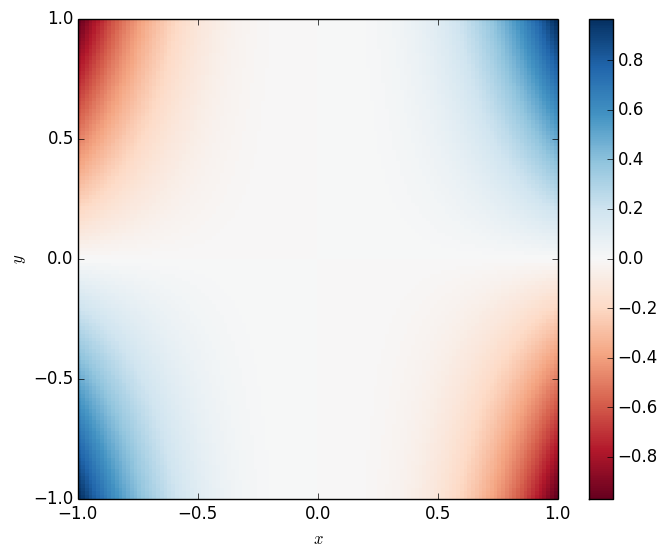

In [31]:
plot_nodes(g, p)

In [32]:
# We will reuse all the needed matrices
G = assemble_G(g);
M = assemble_M(g);
MN = assemble_MN(g);
D = G'*M;

In [33]:
A = D*G; # main matrix
b = -MN*f + g.dx*g_N; # right hand side
pin_pressure!(A, b, p, [div(g.n*g.n, 2)+1]);
#pin_pressure!(A, b, p, get_bdry_corner_nodes(g));
pnew = A\b; # solve the system
println("Using matrix M: $(norm(p-pnew, Inf))");

Using matrix M: 0.00012207031249467093


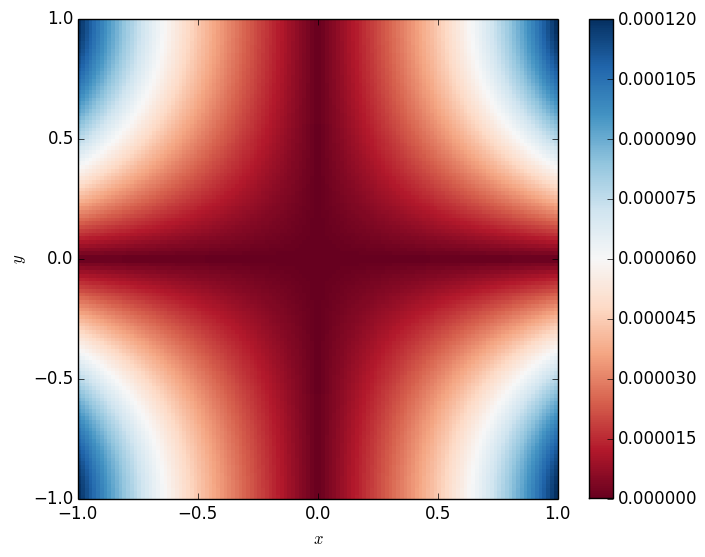

In [34]:
plot_nodes(g, abs(p-pnew))

### Example 5: Homogeneous Neumann Boundary Conditions
Using a pressure function with zeros on the boundary, we can construct a function with zero Neumann boundary conditions:  
Let $u^{\pm} \equiv \cos( \frac{\pi}{2}(x\pm y \pm 1))$. Then define:  
$p = -\cos(\frac{\pi}{2}x)\cos(\frac{\pi}{2}y)$,  
$\vec{u}_{out} = \frac{1}{\sqrt{2}}\left(u^- + u^+, u^- - u^+\right)^T$, and  
$\vec{u}_{in} = \vec{u}_{out} + \nabla p$  

In [12]:
hpi = 0.5*pi;
# pressure solution
pressure5(x, y) = -cos(hpi*x)*cos(hpi*y);

# final velocity solution
up(x,y) = cos(hpi*(x + y + 1.0));
um(x,y) = cos(hpi*(x - y - 1.0));
output_velocity5(x, y) = [um(x,y) + up(x,y), um(x,y) - up(x,y)]/sqrt(2);

# initial conditions
grad_p5(x,y) = [hpi*sin(hpi*x)*cos(hpi*y), hpi*sin(hpi*y)*cos(hpi*x)];
input_velocity5(x, y) = output_velocity5(x,y) + grad_p5(x,y);

# divergence of the input velocity ( also laplacian of pressure )
div_in_vel5(x,y) = hpi*pi*cos(hpi*x)*cos(hpi*y);

In [18]:
dx = 0.1; # side length of one grid cell
g = init_grid(dx);
p, u, u_bdry, u_sol = init(g, pressure5, input_velocity5, output_velocity5);
div_u_in = sample_scalarfield(g, div_in_vel5);
dp = sample_bdry_vecfield(g, grad_p5);

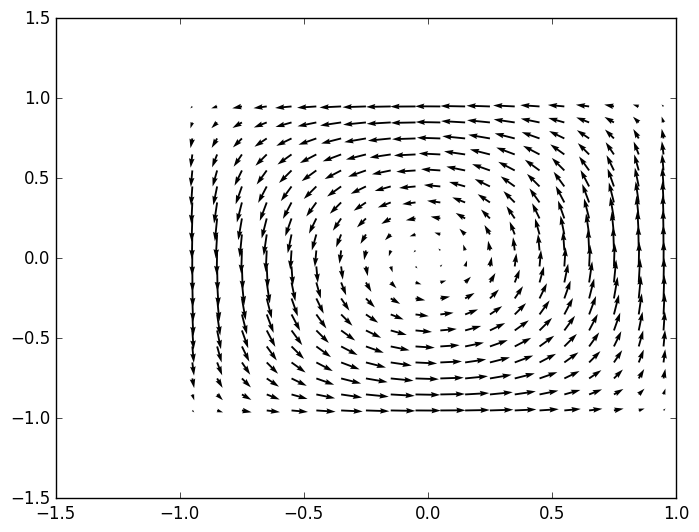

In [19]:
#plot_nodes(g,p);
plot_vecfield(g,u_sol);

In [15]:
# We will reuse all the needed matrices
G = assemble_G(g);
assert(norm(u_sol - u + G*p) <= 0.5*g.dx);
M = assemble_M(g);
MN = assemble_MN(g);
D = G'*M;

In [16]:
# Assemble the linear system using the edge based mass matrix M
A = D*G; # main matrix
b = D*u; # right hand side
pin_pressure!(A, b, p, 1);#[div(g.n*g.n, 2)+1]);
pnew = A\b; # solve the system
println("Using matrix M: $(norm(p-pnew, Inf))");
unew = u - G*pnew; # compute the new velocity field;

Using matrix M: 1.0280921532546117e-5


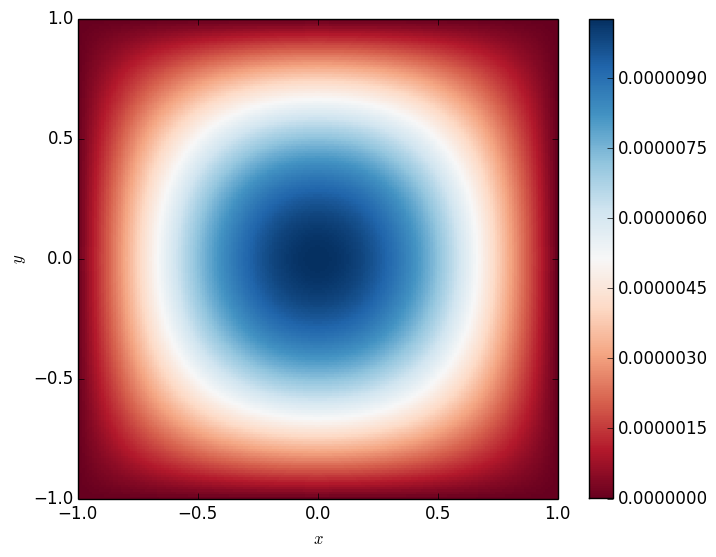

In [49]:
plot_nodes(g, abs(p-pnew))

### Example 6
We proceed as previously with:  
$p = xy^3$,  
$\vec{u}_{out} = \left(y, -x\right)^T$, and  
$\vec{u}_{in} = (y + y^3, -x + 3xy^2)^T$,  
but with heterogeneous Neumann boundary conditions.

In [51]:
# pressure solution
pressure6(x, y) = x*y*y*y;
grad_p6(x, y) = [y*y*y, 3*x*y*y];

# final velocity solution
output_velocity6(x, y) = [y, -x];

# initial conditions
input_velocity6(x, y) = output_velocity6(x,y) + grad_p6(x,y);
div_in_vel6(x, y) = 6*x*y;

In [52]:
dx = 0.005; # side length of one grid cell
g = init_grid(dx);
p, u, u_bdry, u_sol = init(g, pressure6, input_velocity6, output_velocity6);
div_u_in = sample_scalarfield(g, div_in_vel6);
dp = sample_bdry_vecfield(g, grad_p6);
u_out = sample_bdry_vecfield(g, output_velocity6);

In [53]:
G = assemble_G(g);
M = assemble_M(g);
MN = assemble_MN(g);
#B = assemble_B(g);
D = G'*M;

In [54]:
# Assemble the linear system using the edge based mass matrix M
A = D*G; # rebuild, since we modified it after enforcing boundary conditions

# the following norm must go to zero quadratically for a good scheme
#display(norm(g.dx*dp - g.dx*B*G*p,Inf));

#b = D*u - g.dx*u_bdry + g.dx*dp;
b = D*u - g.dx*u_out;
pin_pressure!(A, b, p, [div(g.n*g.n, 2)]);
println("Using matrix M: $(norm(p-A\b, Inf))");

Using matrix M: 3.1249997876070523e-6


## Convergence in the examples
We will now look at the convergence of the projection method with respect to grid size.

In [23]:
# Various interpolation matrices usefull for computing properly weighted error norms

# Build a matrix that approximates edge based quantities on the nodes
function assemble_EtoN(g::MFDGrid)
    rows = [get_bdry_nodes_without_corners(g), g.n*g.n];
    cols = [get_normal_bdry_edges_without_corners(g), 2*g.ne];
    values = [ones(length(rows)-1), 0];
    sparse(rows,cols,values)
end;

# Build a matrix that promotes nodal values to cell centers
function assemble_NtoC(g::MFDGrid)
end;

# Build a matrix that promotes edge values to cell centers
function assemble_EtoC(g::MFDGrid)
end;

In [24]:
# Define priniting routines
function printheader()
    @printf(".grid , P inf, order, v inf, order, ");
    @printf("P  2 , order, v  2 , order, ");
    @printf("P  1 , order, v  1 , order\n");
end

function printdata!(g::MFDGrid, pdiff, udiff, prev)
    pmax = norm(pdiff, Inf);
    p2 = 0.5*g.dx*norm(pdiff, 2);
    p1 = 0.25*g.dx*g.dx*norm(pdiff, 1);    
    umax = norm(udiff, Inf);
    u2 = 0.5*g.dx*norm(udiff, 2);
    u1 = 0.25*g.dx*g.dx*norm(udiff, 1);
    data = [pmax, umax, p2, u2, p1, u1];

    order = zeros(6);
    if ( prev != zeros(6) )
        order = log2(prev./data);
    end
    
    @printf("%4d^2", g.n-1);
    for i = 1:6
        @printf(", %4.0e, %5.2f", data[i], order[i]);
    end
    @printf("\n");
    prev[:] = data;
end;

function print_poisson_header() # no velocity data
    @printf(".grid , P inf, order, P  2 , order, P  1 , order \n");
end
# same as printdata! but no velocity data
function print_poisson_data!(g::MFDGrid, pdiff, prev)
    pmax = norm(pdiff, Inf);
    p2 = 0.5*g.dx*norm(pdiff, 2);
    p1 = 0.25*g.dx*g.dx*norm(pdiff, 1);    
    data = [pmax, p2, p1];

    order = zeros(3);
    if ( prev != zeros(3) )
        order = log2(prev./data);
    end
    
    @printf("%4d^2", g.n-1);
    for i = 1:3
        @printf(", %4.0e, %5.2f", data[i], order[i]);
    end
    @printf("\n");
    prev[:] = data;
end;

In [25]:
# Convenience routine to assemble system given a pressure, input velocity
# and output velocity functions
function assemble(dx, pres, v_in, v_out)
    # Assemble the linear system using the edge based mass matrix M
    g = init_grid(dx);
    p, u_in, u_bdry, u_sol = init(g, pres, v_in, v_out);
    G = assemble_G(g);
    M = assemble_M(g);
    D = G'*M;
    A = D*G;
    b = D*u_in;# + g.dx*u_bdry;
    A, b, D, G, p, u_in, u_bdry, u_sol, g
end
# Convenience method to solve the system and output the differences
function solve(A, b, G, p, u_in, u_sol)
    pnew = A\b;
    unew = u_in - G*pnew;
    pdiff = p - pnew;
    udiff = u_sol - unew;
    pdiff, udiff
end;

In [26]:
# Convenience routine to assemble a poisson system given a pressure,
# source term and optional Neumann boundary function
# (default is homogeneous BC)
function assemble_poisson(dx, pres, source, grad_pres = (x,y)->[0,0])
    # Assemble the linear system using the edge based mass matrix M
    g = init_grid(dx);
    p = sample_scalarfield(g, pres);
    f = sample_scalarfield(g, source);
    g_N = sample_bdry_vecfield(g, grad_pres);
    G = assemble_G(g);
    M = assemble_M(g);
    MN = assemble_MN(g);
    D = G'*M;
    A = D*G;
    b = -MN*f + g.dx*g_N;
    A, b, G, p, g
end
# Convenience method to solve the system and output the difference
function solve_poisson(A, b, G, p)
    pnew = A\b;
    pdiff = p - pnew;
    pdiff
end;

### Example 1

In [27]:
is1 = collect(1:10);
dxs = 2./2.^is1;
printheader();
prev = zeros(6);
data1 = Array(Float64,(length(is1),6));
for i in is1
    dx = dxs[i];
    A, b, D, G, p, u_in, u_bdry, u_sol, g =
        assemble(dx, pressure1, input_velocity1, output_velocity1);
    force_dirichlet!(g, A, b, p);
    pdiff, udiff = solve(A, b, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data1[i,1:6] = prev;
end

.grid , P inf, order, v inf, order, P  2 , order, v  2 , order, P  1 , order, v  1 , order
   2^2, 0e+00,  0.00, 0e+00,  0.00, 0e+00,  0.00, 0e+00,  0.00, 0e+00,  0.00, 0e+00,  0.00
   4^2, 2e-16,  0.00, 4e-16,  0.00, 7e-17,  0.00, 2e-16,  0.00, 3e-17,  0.00, 2e-16,  0.00
   8^2, 4e-16, -1.00, 1e-15, -1.32, 2e-16, -1.48, 6e-16, -1.48, 2e-16, -2.16, 7e-16, -1.77
  16^2, 9e-16, -1.00, 4e-15, -1.68, 3e-16, -0.31, 1e-15, -1.12, 2e-16, -0.13, 1e-15, -0.89
  32^2, 7e-15, -3.07, 2e-14, -2.32, 3e-15, -3.51, 8e-15, -2.49, 2e-15, -3.72, 8e-15, -2.78
  64^2, 3e-14, -2.23, 7e-14, -2.00, 2e-14, -2.56, 4e-14, -2.36, 1e-14, -2.61, 4e-14, -2.40
 128^2, 1e-13, -1.56, 2e-13, -1.38, 5e-14, -1.63, 1e-13, -1.61, 4e-14, -1.64, 1e-13, -1.60
 256^2, 5e-13, -2.14, 8e-13, -2.07, 2e-13, -2.13, 5e-13, -2.12, 2e-13, -2.12, 6e-13, -2.13
 512^2, 2e-12, -2.05, 3e-12, -2.02, 9e-13, -2.04, 2e-12, -2.04, 8e-13, -2.04, 2e-12, -2.04
1024^2

This example cannot demonstrate any convergence behaviour because truncation error is clearly dominated by roundoff errors.

### Example 2

In [28]:
is2 = collect(1:10);
dxs = 2./2.^is2;
printheader();
prev = zeros(6); # a previous set of data
data2 = Array(Float64,(length(is2),6));
for i in is2
    dx = dxs[i];
    A, b, D, G, p, u_in, u_bdry, u_sol, g =
        assemble(dx, pressure2, input_velocity2, output_velocity2);
    force_dirichlet!(g, A, b, p);
    pdiff, udiff = solve(A, b, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data2[i,1:6] = prev;
end

, 8e-12, -2.03, 1e-11, -2.01, 4e-12, -2.02, 9e-12, -2.02, 3e-12, -2.02, 1e-11, -2.02
.grid , P inf, order, v inf, order, P  2 , order, v  2 , order, P  1 , order, v  1 , order
   2^2, 0e+00,  0.00, 3e-01,  0.00, 0e+00,  0.00, 3e-01,  0.00, 0e+00,  0.00, 3e-01,  0.00
   4^2, 0e+00,   NaN, 6e-02,  2.00, 0e+00,   NaN, 5e-02,  2.34, 0e+00,   NaN, 5e-02,  2.42
   8^2, 4e-17,  -Inf, 2e-02,  2.00, 1e-17,  -Inf, 1e-02,  2.21, 1e-17,  -Inf, 1e-02,  2.26
  16^2, 2e-16, -2.00, 4e-03,  2.00, 4e-17, -1.56, 2e-03,  2.12, 3e-17, -1.48, 2e-03,  2.15
  32^2, 4e-16, -1.22, 1e-03,  2.00, 8e-17, -0.87, 6e-04,  2.06, 6e-17, -1.06, 5e-04,  2.08
  64^2, 1e-15, -1.92, 2e-04,  2.00, 5e-16, -2.49, 1e-04,  2.03, 3e-16, -2.57, 1e-04,  2.04
 128^2, 6e-15, -1.97, 6e-05,  2.00, 2e-15, -2.22, 4e-05,  2.02, 2e-15, -2.27, 3e-05,  2.02
 256^2, 2e-14, -2.06, 2e-05,  2.00, 1e-14, -2.21, 9e-06,  2.01, 8e-15, -2.22, 8e-06,  2.01
 512^2, 1e-13, -2.08, 4e-06,  2.00, 4e-14, -2.09, 2e-06,  2.00, 3e-14, -2.09, 2e-06,  2.01
1024^

In this Dirichlet problem, we can observe second order convergence in velocity in all 3 norms.

### Example 3

In [95]:
is3 = collect(1:12);
dxs = 2./2.^is3;
print_poisson_header();
prev = zeros(3); # a previous set of data
data3 = Array(Float64,(length(is3),3));
for i in is3
    dx = dxs[i];
    # Assemble the linear system using the edge based mass matrix M
    g = init_grid(dx);
    A, b, G, p, g = assemble_poisson(dx, pressure3, source3);
    pin_pressure!(A, b, p, [div(g.n*g.n, 2)+1]);
    pdiff = solve_poisson(A, b, G, p);
    print_poisson_data!(g, pdiff, prev);
    data3[i,1:3] = prev;
end

.grid , P inf, order, P  2 , order, P  1 , order 
   2^2, 1e+00,  0.00, 1e+00,  0.00, 2e+00,  0.00
   4^2, 7e-01,  0.57, 8e-01,  0.59, 9e-01,  0.83
   8^2, 2e-02,  4.90, 1e-02,  5.88, 1e-02,  6.28
  16^2, 1e-01, -2.31, 1e-01, -3.13, 1e-01, -3.29
  32^2, 2e-01, -0.84, 2e-01, -0.84, 2e-01, -0.79
  64^2, 2e-01, -0.08, 2e-01, -0.06, 2e-01, -0.04
 128^2, 5e-02,  2.20, 5e-02,  2.21, 5e-02,  2.22
 256^2, 7e-02, -0.66, 7e-02, -0.65, 7e-02, -0.65
 512^2, 1e-01, -0.83, 1e-01, -0.82, 1e-01, -0.82
1024^2, 1e-01, -0.17, 1e-01, -0.17, 1e-01, -0.17


This first Poisson problem with homogeneous Neumann boundary conditions shows second order convergence in pressure. We pin down the pressure at the corners of the square domain to get a unique solution. 

### Example 4

In [85]:
is4 = collect(1:12);
dxs = 2./2.^is4;
print_poisson_header();
prev = zeros(3); # a previous set of data
data4 = Array(Float64,(length(is4),3));
for i in is4
    dx = dxs[i];
    # Assemble the linear system using the edge based mass matrix M
    g = init_grid(dx);
    A, b, G, p, g = assemble_poisson(dx, pressure4, source4, grad_p4)
    pin_pressure!(A, b, p, [div(g.n*g.n, 2)+1]);
    pdiff = solve_poisson(A, b, G, p);
    print_poisson_data!(g, pdiff, prev);
    data4[i,1:3] = prev;
end

.grid , P inf, order, P  2 , order, P  1 , order 
   2^2, 5e-01,  0.00, 5e-01,  0.00, 5e-01,  0.00
   4^2, 1e-01,  2.00, 8e-02,  2.66, 7e-02,  2.83
   8^2, 3e-02,  2.00, 1e-02,  2.41, 1e-02,  2.53
  16^2, 8e-03,  2.00, 3e-03,  2.24, 2e-03,  2.30
  32^2, 2e-03,  2.00, 7e-04,  2.13, 6e-04,  2.16
  64^2, 5e-04,  2.00, 2e-04,  2.07, 1e-04,  2.09
 128^2, 1e-04,  2.00, 4e-05,  2.03, 3e-05,  2.04
 256^2, 3e-05,  2.00, 1e-05,  2.02, 8e-06,  2.02
 512^2, 8e-06,  2.00, 3e-06,  2.01, 2e-06,  2.01
1024^2, 2e-06,  2.00, 6e-07,  2.00, 5e-07,  2.01
2048^2, 5e-07,  2.00, 2e-07,  2.00, 1e-07,  2.00
4096^2, 1e-07,  2.00, 4e-08,  2.00, 3e-08,  2.00


This Poisson problem with heterogeneous Neumann boundary conditions also shows second order convergence in pressure.

### Example 5

In [24]:
is5 = collect(1:12);
dxs = 2./2.^is5;
printheader();
prev = zeros(6); # a previous set of data
data5 = Array(Float64,(length(is5),6));
for i in is5
    dx = dxs[i];
    A, b, D, G, p, u_in, u_bdry, u_sol, g =
        assemble(dx, pressure5, input_velocity5, output_velocity5);
    #MN = assemble_MN(g);
    #div_u_in = sample_scalarfield(g, div_in_vel5);
    #dp = sample_bdry_vecfield(g, grad_p5);
    #b = -MN*div_u_in + g.dx*dp;
    #b = D*u_in + g.dx*dp - g.dx*u_bdry;
    pin_pressure!(A, b, p, [div(g.n*g.n, 2)+1]);
    pdiff, udiff = solve(A, b, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data5[i,1:6] = prev;
end

.grid , P inf, order, v inf, order, P  2 , order, v  2 , order, P  1 , order, v  1 , order
   2^2, 1e-01,  0.00, 2e-16,  0.00, 2e-01,  0.00, 2e-16,  0.00, 2e-01,  0.00, 3e-16,  0.00
   4^2, 3e-02,  2.08, 2e-16,  0.00, 3e-02,  2.52, 2e-16, -0.19, 3e-02,  2.82, 3e-16, -0.27
   8^2, 6e-03,  2.02, 2e-15, -3.39, 5e-03,  2.31, 8e-16, -1.79, 6e-03,  2.48, 9e-16, -1.49
  16^2, 2e-03,  2.00, 1e-14, -2.49, 1e-03,  2.17, 2e-15, -1.37, 1e-03,  2.27, 2e-15, -0.96
  32^2, 4e-04,  2.00, 2e-13, -3.90, 3e-04,  2.09, 2e-14, -3.05, 3e-04,  2.14, 9e-15, -2.44
  64^2, 1e-04,  2.00, 2e-12, -3.11, 7e-05,  2.05, 9e-14, -2.25, 6e-05,  2.07, 4e-14, -2.05
 128^2, 3e-05,  2.00, 1e-11, -3.05, 2e-05,  2.03, 4e-13, -2.16, 2e-05,  2.04, 2e-13, -2.05
 256^2, 6e-06,  2.00, 1e-10, -3.08, 4e-06,  2.01, 2e-12, -2.17, 4e-06,  2.02, 7e-13, -2.06
 512^2, 2e-06,  2.00, 1e-09, -3.02, 1e-06,  2.01, 7e-12, -2.11, 9e-07,  2.01, 3e-12, -2.03
1024^2, 4e-07,  2.00, 8e-09, -3.00, 3e-07,  2.00, 3e-11, -2.08, 2e-07,  2.01, 1e-11, -2.01

This final Neumann problem demonstrates second order convergence in the pressure variable. The error in velocity is dominated by roundoff errors.

### Example 6

In [122]:
is6 = collect(1:12);
dxs = 2./2.^is6;
printheader();
prev = zeros(6); # a previous set of data
data6 = Array(Float64,(length(is6),6));
for i in is6
    dx = dxs[i];
    A, b, D, G, p, u_in, u_bdry, u_sol, g =
        assemble(dx, pressure6, input_velocity6, output_velocity6);
    MN = assemble_MN(g);
    u_solid = sample_bdry_vecfield(g, output_velocity6);
    b = D*u_in - g.dx*u_solid;
    pin_pressure!(A, b, p, [div(g.n*g.n, 2)+1]);
    pdiff, udiff = solve(A, b, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data6[i,1:6] = prev;
end

, 2e-08,  2.07, 5e-07, -3.00, 2e-08,  2.10, 6e-10, -2.06, 1e-08,  2.12, 2e-10, -2.00
.grid , P inf, order, v inf, order, P  2 , order, v  2 , order, P  1 , order, v  1 , order
   2^2, 1e-01,  0.00, 1e-01,  0.00, 1e-01,  0.00, 2e-01,  0.00, 1e-01,  0.00, 3e-01,  0.00
   4^2, 3e-02,  2.00, 4e-02,  1.68, 2e-02,  2.66, 3e-02,  2.36, 2e-02,  2.83, 4e-02,  2.54
   8^2, 8e-03,  2.00, 1e-02,  1.91, 4e-03,  2.41, 7e-03,  2.24, 3e-03,  2.53, 8e-03,  2.35
  16^2, 2e-03,  2.00, 3e-03,  1.98, 8e-04,  2.24, 2e-03,  2.15, 6e-04,  2.30, 2e-03,  2.20
  32^2, 5e-04,  2.00, 7e-04,  2.00, 2e-04,  2.13, 4e-04,  2.08, 1e-04,  2.16, 4e-04,  2.10
  64^2, 1e-04,  2.00, 2e-04,  2.00, 4e-05,  2.07, 9e-05,  2.04, 3e-05,  2.09, 1e-04,  2.05
 128^2, 3e-05,  2.00, 4e-05,  2.00, 1e-05,  2.03, 2e-05,  2.02, 8e-06,  2.04, 3e-05,  2.03
 256^2, 8e-06,  2.00, 1e-05,  2.00, 3e-06,  2.02, 6e-06,  2.01, 2e-06,  2.02, 6e-06,  2.01
 512^2, 2e-06,  2.00, 3e-06,  2.00, 6e-07,  2.01, 1e-06,  2.01, 5e-07,  2.01, 2e-06,  2.01
1024^

This example shows that we if we are given the gradient of the pressure at pressure nodes, we can construct a scheme that solves the heterogeneous Neumann problem with reasonable convergence in both pressure and velocity.

## Plots of Convergence in Examples 2 and 5

In [29]:
# Define plotting routines
function plot_results(xdata,ydata,ylabel)
    logydata = log2(ydata);
    a,b = linreg(xdata, logydata);
    pl = plot(x=xdata, y=logydata, Geom.point,
              Guide.XLabel("Grid Size"), Guide.YLabel("Log( $ylabel )"));
    append!(pl.layers, layer(x=xdata, y=[a+b*i for i in xdata], Geom.line));
    println("slope = $b");
    println("R = $(cor(xdata,logydata))");
    pl
end;
function plot_results2(x,y,ylabel)
    logy = log2(y);
    a,b = linreg(x, logy);
    plt.subplot(1, 1, 1)
    plt.plot(x,logy, ".");
    plt.plot(x,b*x + a, "-");
    plt.xlabel(L"$\Delta x$");
    plt.ylabel(ylabel);
    println("slope = $b");
    println("R = $(cor(x,logy))");
    plt.show();
end;

The following charts visualize our convergence results in velocity and pressure as seen in examples 2 and 5 respectively.

slope = -2.0


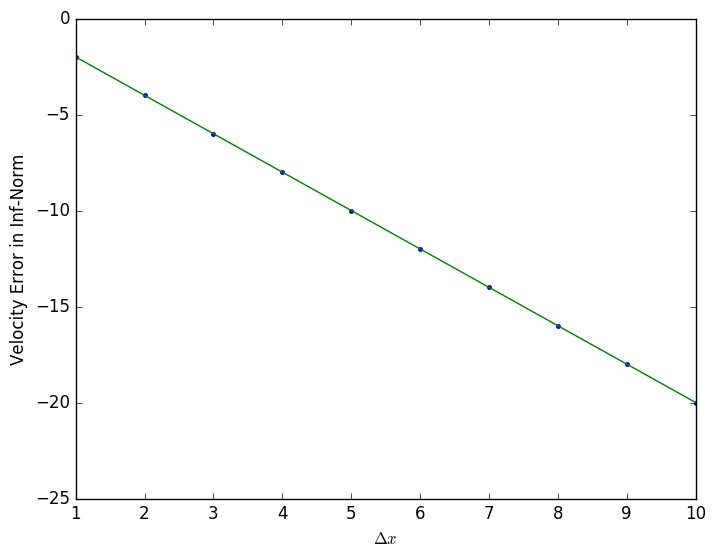

R = -1.0


In [31]:
plot_results2(collect(1.0:size(data2, 1)), data2[:,2], "Velocity Error in Inf-Norm")

slope = -2.071597850429141
R = -0.9997362188400625


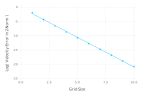

In [74]:
plot_results([1.0:size(data2, 1)], data2[:,4], "Velocity Error in 2-Norm")

slope = -2.0913288687472105
R = -0.9995979973245079


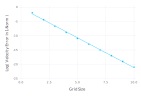

In [75]:
plot_results([1.0:size(data2, 1)], data2[:,6], "Velocity Error in 1-Norm")

slope = -2.0071857461953706
R = -0.9999911120416293


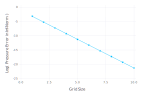

In [76]:
plot_results([1.0:size(data5, 1)], data5[:,1], "Pressure Error in Inf-Norm")

slope = -2.1079099465620477
R = -0.9994145563475141


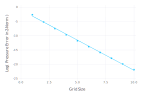

In [77]:
plot_results([1.0:size(data5, 1)], data5[:,3], "Pressure Error in 2-Norm")

slope = -2.1659422465558116
R = -0.9986502656073218


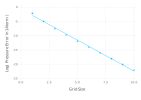

In [78]:
plot_results([1.0:size(data5, 1)], data5[:,5], "Pressure Error in 1-Norm")